In [ ]:
%load_ext autoreload
%autoreload 2

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from dogo.results import get_results

In [2]:
plt.rc('font', size=16)

# MP0134-MP0139

In [8]:
MP100 = get_results("MP100")
MP101 = get_results("MP101")
MP102 = get_results("MP102")
MP103 = get_results("MP103")
MP104 = get_results("MP104")
MP105 = get_results("MP105")
MP106 = get_results("MP106")
MP107 = get_results("MP107")
MP108 = get_results("MP108")
MP109 = get_results("MP109")
MP110 = get_results("MP110")
MP111 = get_results("MP111")
MP134 = get_results("MP134")
MP135 = get_results("MP135")
MP136 = get_results("MP136")
MP137 = get_results("MP137")
MP138 = get_results("MP138")
MP139 = get_results("MP139")

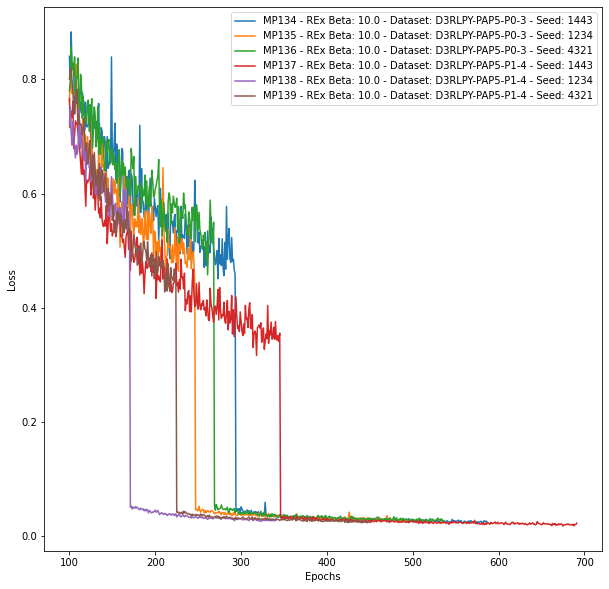

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
for exp in [
    MP134,
    MP135,
    MP136,
    MP137,
    MP138,
    MP139,
]:
    ax.plot(exp.dynamics.model_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend()
pass

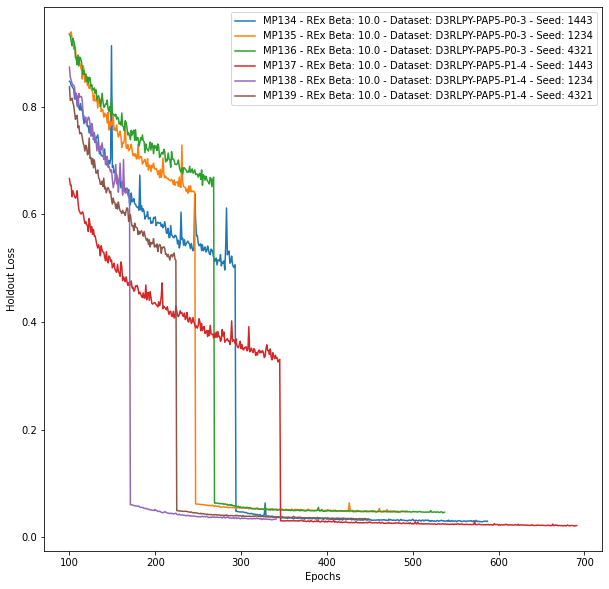

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
for exp in [
    MP134,
    MP135,
    MP136,
    MP137,
    MP138,
    MP139,
]:
    ax.plot(exp.dynamics.model_holdout_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
ax.set_xlabel('Epochs')
ax.set_ylabel('Holdout Loss')
ax.legend()
pass

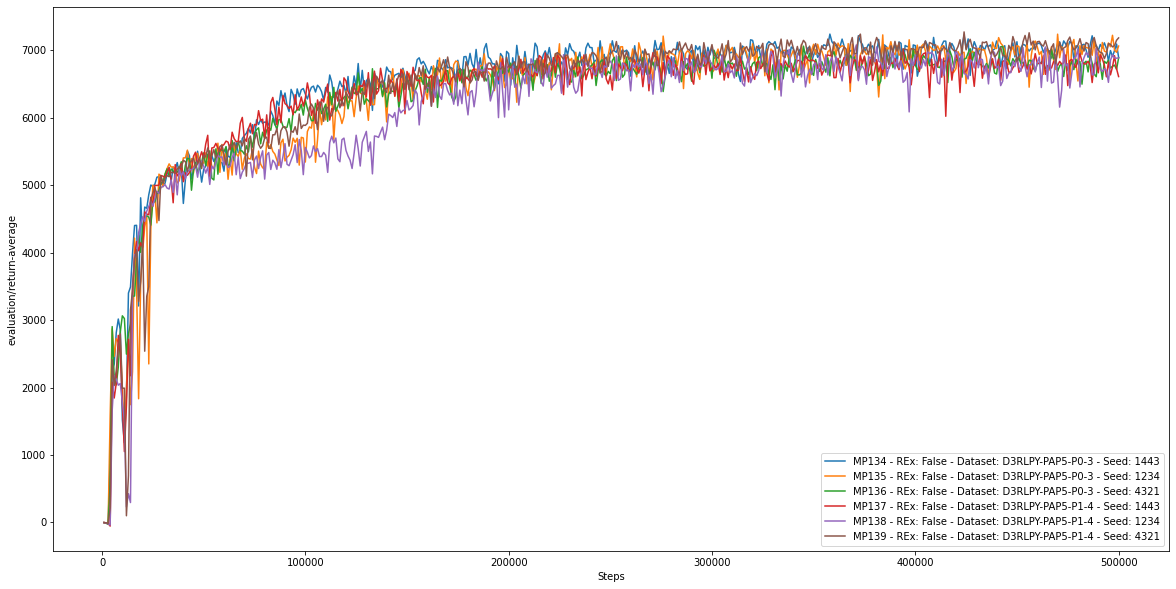

In [11]:
feature = 'evaluation/return-average'
fig, ax = plt.subplots(1, 1, figsize=(20,10))
for exp in [
    MP134,
    MP135,
    MP136,
    MP137,
    MP138,
    MP139,
]:
    ax.plot(
        exp.sac.result['timesteps_total'], exp.sac.result[feature], label=f'{exp.name} - REx: {exp.rex} - Dataset: {exp.dataset} - Seed: {exp.seed}', ls='--' if exp.rex else '-'
    )
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

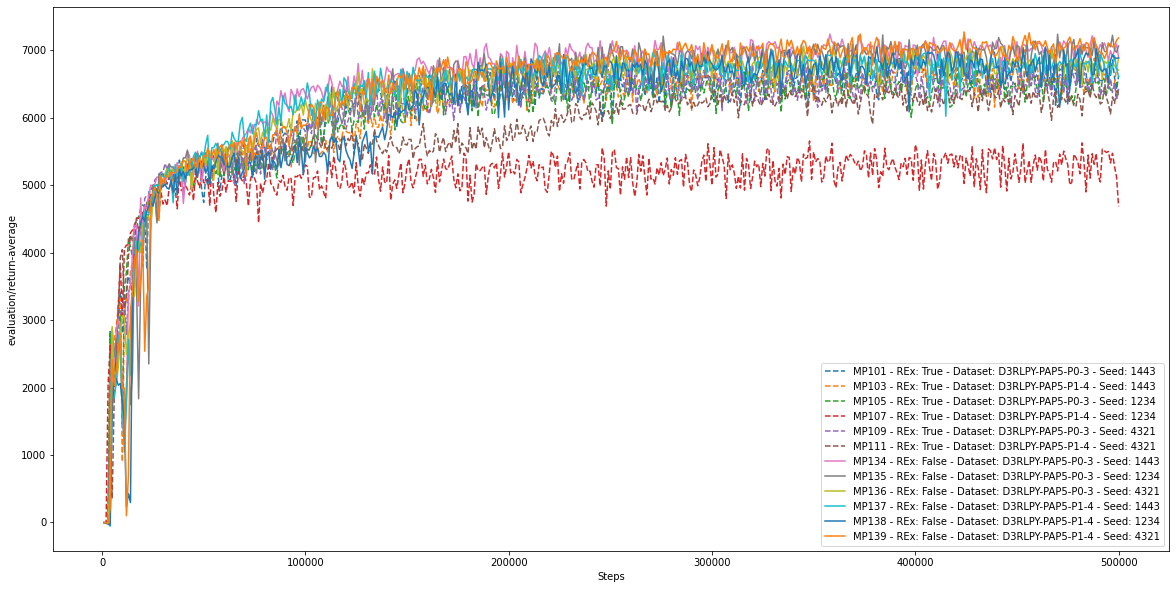

In [12]:
feature = 'evaluation/return-average'
fig, ax = plt.subplots(1, 1, figsize=(20,10))
for exp in [
    # MP100,
    MP101,
    # MP102,
    MP103,
    # MP104,
    MP105,
    # MP106,
    MP107,
    # MP108,
    MP109,
    # MP110,
    MP111,
    MP134,
    MP135,
    MP136,
    MP137,
    MP138,
    MP139,
]:
    ax.plot(
        exp.sac.result['timesteps_total'], exp.sac.result[feature], label=f'{exp.name} - REx: {exp.rex} - Dataset: {exp.dataset} - Seed: {exp.seed}', ls='--' if exp.rex else '-'
    )
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

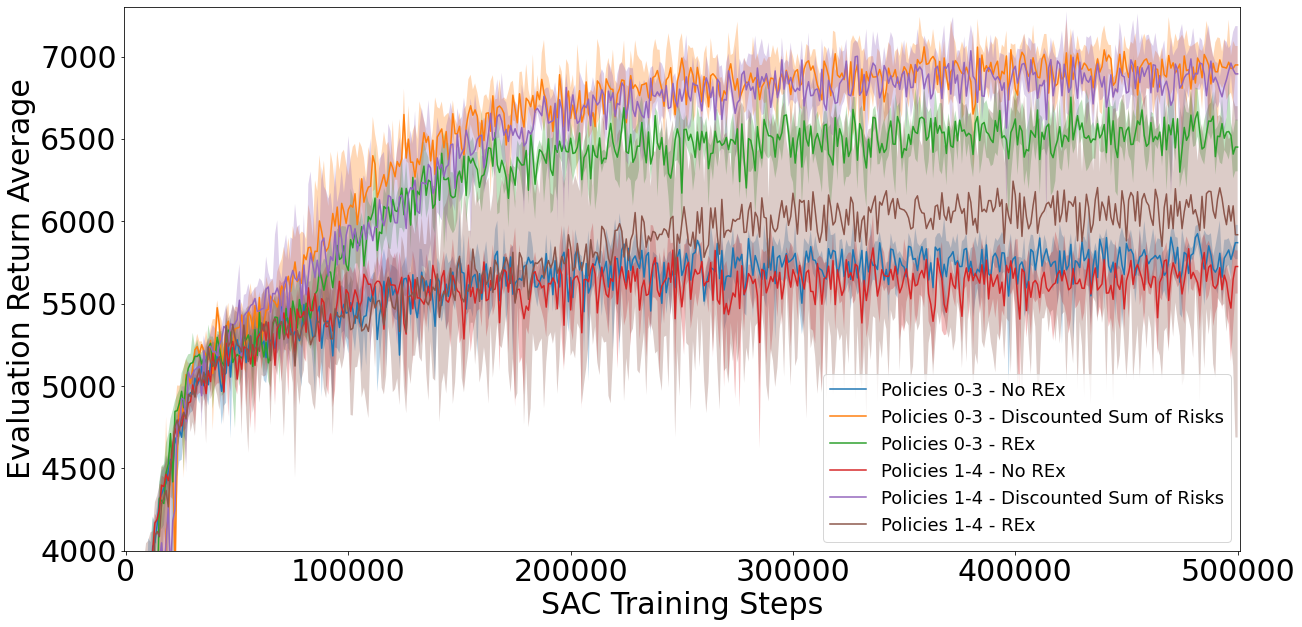

In [23]:
feature = 'evaluation/return-average'
fig, ax = plt.subplots(1, 1, figsize=(20,10))
plt.rc('font', size=30)

d3rlpy_pap5_p0_3_no_rex       = np.vstack((MP100.sac.result[feature], MP104.sac.result[feature], MP108.sac.result[feature]))
d3rlpy_pap5_p1_4_no_rex       = np.vstack((MP102.sac.result[feature], MP106.sac.result[feature], MP110.sac.result[feature]))
d3rlpy_pap5_p0_3_no_rex_decay = np.vstack((MP134.sac.result[feature], MP135.sac.result[feature], MP136.sac.result[feature]))
d3rlpy_pap5_p1_4_no_rex_decay = np.vstack((MP137.sac.result[feature], MP138.sac.result[feature], MP139.sac.result[feature]))
d3rlpy_pap5_p0_3_rex          = np.vstack((MP101.sac.result[feature], MP105.sac.result[feature], MP109.sac.result[feature]))
d3rlpy_pap5_p1_4_rex          = np.vstack((MP103.sac.result[feature], MP107.sac.result[feature], MP111.sac.result[feature]))

ax.plot(np.arange(0, 500001, 1000), d3rlpy_pap5_p0_3_no_rex.mean(axis=0), label='Policies 0-3 - No REx')
ax.fill_between(np.arange(0, 500001, 1000), d3rlpy_pap5_p0_3_no_rex.min(axis=0), d3rlpy_pap5_p0_3_no_rex.max(axis=0), alpha=0.3)

ax.plot(np.arange(0, 500001, 1000), d3rlpy_pap5_p0_3_no_rex_decay.mean(axis=0), label='Policies 0-3 - Discounted Sum of Risks')
ax.fill_between(np.arange(0, 500001, 1000), d3rlpy_pap5_p0_3_no_rex_decay.min(axis=0), d3rlpy_pap5_p0_3_no_rex_decay.max(axis=0), alpha=0.3)

ax.plot(np.arange(0, 500001, 1000), d3rlpy_pap5_p0_3_rex.mean(axis=0), label='Policies 0-3 - REx')
ax.fill_between(np.arange(0, 500001, 1000), d3rlpy_pap5_p0_3_rex.min(axis=0), d3rlpy_pap5_p0_3_rex.max(axis=0), alpha=0.3)

ax.plot(np.arange(0, 500001, 1000), d3rlpy_pap5_p1_4_no_rex.mean(axis=0), label='Policies 1-4 - No REx')
ax.fill_between(np.arange(0, 500001, 1000), d3rlpy_pap5_p1_4_no_rex.min(axis=0), d3rlpy_pap5_p1_4_no_rex.max(axis=0), alpha=0.3)

ax.plot(np.arange(0, 500001, 1000), d3rlpy_pap5_p1_4_no_rex_decay.mean(axis=0), label='Policies 1-4 - Discounted Sum of Risks')
ax.fill_between(np.arange(0, 500001, 1000), d3rlpy_pap5_p1_4_no_rex_decay.min(axis=0), d3rlpy_pap5_p1_4_no_rex_decay.max(axis=0), alpha=0.3)

ax.plot(np.arange(0, 500001, 1000), d3rlpy_pap5_p1_4_rex.mean(axis=0), label='Policies 1-4 - REx')
ax.fill_between(np.arange(0, 500001, 1000), d3rlpy_pap5_p1_4_rex.min(axis=0), d3rlpy_pap5_p1_4_rex.max(axis=0), alpha=0.3)

ax.set_xlabel('SAC Training Steps')
ax.set_ylabel('Evaluation Return Average')
# ax.set_ylabel(feature)
ax.set_xlim(-1000, 501000)
ax.set_ylim(4000, 7300)
ax.legend(prop={'size': 18})
fig.savefig(os.path.join('dogo_plots', f'average_returns_PAP5_wide.png'), pad_inches=0.2, bbox_inches='tight')
pass

# MP140-MP145

In [ ]:
MP140 = get_results("MP140")
MP141 = get_results("MP141")
MP142 = get_results("MP142")
MP143 = get_results("MP143")
MP144 = get_results("MP144")
MP145 = get_results("MP145")

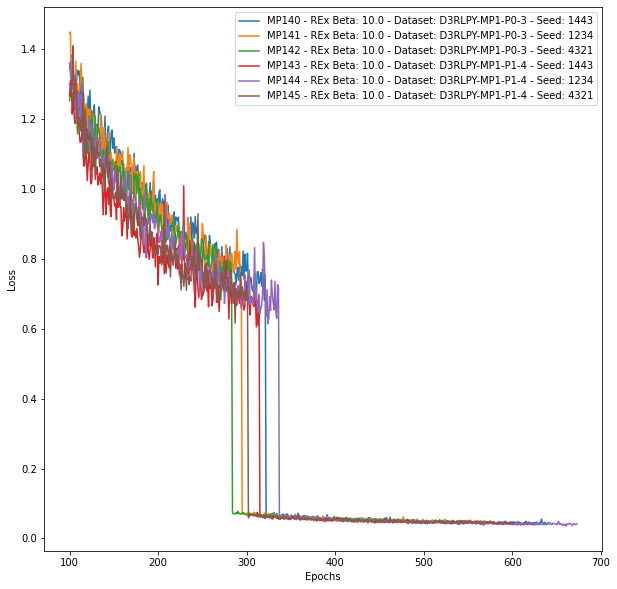

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
for exp in [
    MP140,
    MP141,
    MP142,
    MP143,
    MP144,
    MP145,
]:
    ax.plot(exp.dynamics.model_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend()
pass

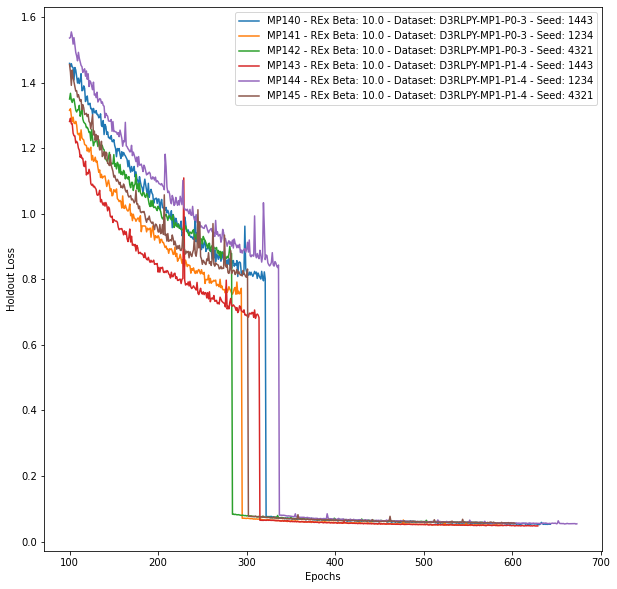

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
for exp in [
    MP140,
    MP141,
    MP142,
    MP143,
    MP144,
    MP145,
]:
    ax.plot(exp.dynamics.model_holdout_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
ax.set_xlabel('Epochs')
ax.set_ylabel('Holdout Loss')
ax.legend()
pass

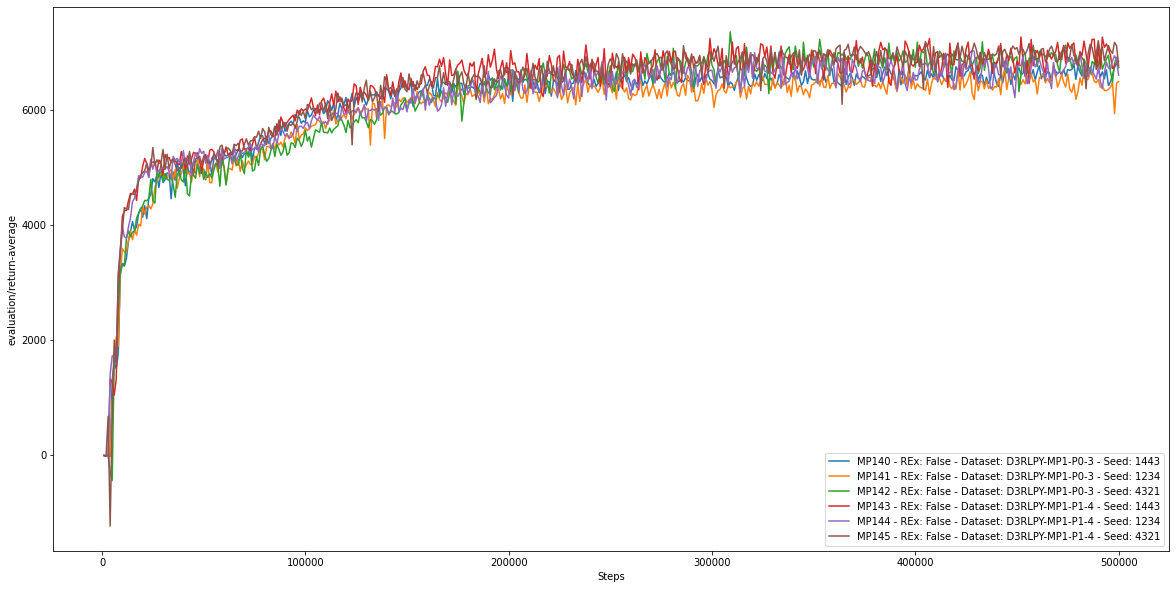

In [ ]:
feature = 'evaluation/return-average'
fig, ax = plt.subplots(1, 1, figsize=(20,10))
for exp in [
    MP140,
    MP141,
    MP142,
    MP143,
    MP144,
    MP145,
]:
    ax.plot(
        exp.sac.result['timesteps_total'], exp.sac.result[feature], label=f'{exp.name} - REx: {exp.rex} - Dataset: {exp.dataset} - Seed: {exp.seed}', ls='--' if exp.rex else '-'
    )
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

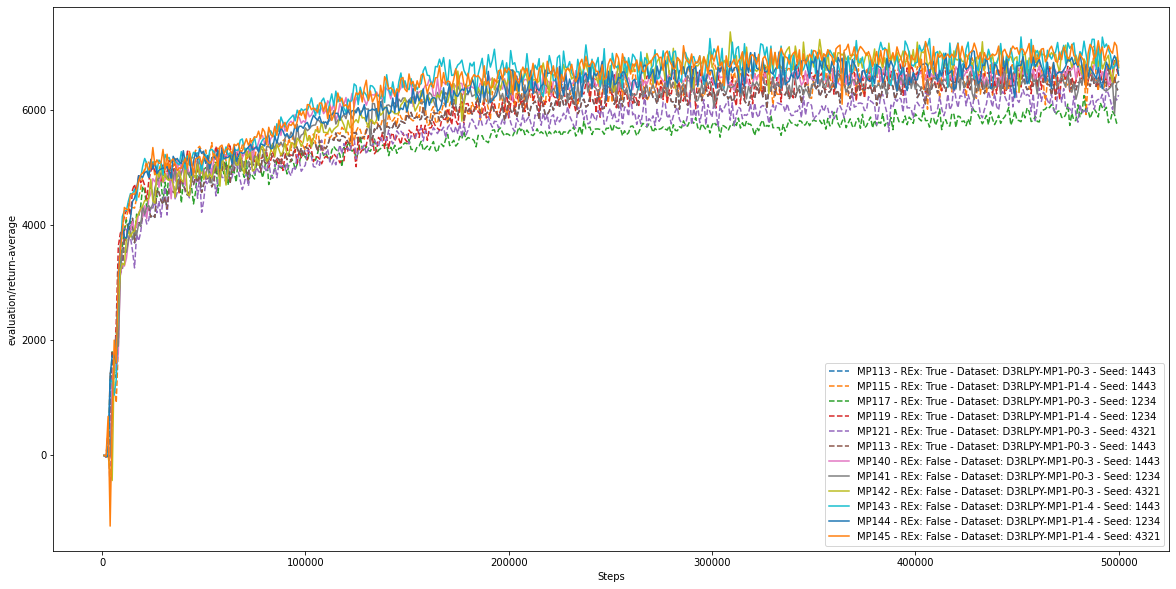

In [ ]:
feature = 'evaluation/return-average'
fig, ax = plt.subplots(1, 1, figsize=(20,10))
for exp in [
    # MP112,
    MP113,
    # MP114,
    MP115,
    # MP116,
    MP117,
    # MP118,
    MP119,
    # MP120,
    MP121,
    # MP122,
    MP113,
    MP140,
    MP141,
    MP142,
    MP143,
    MP144,
    MP145,
]:
    ax.plot(
        exp.sac.result['timesteps_total'], exp.sac.result[feature], label=f'{exp.name} - REx: {exp.rex} - Dataset: {exp.dataset} - Seed: {exp.seed}', ls='--' if exp.rex else '-'
    )
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

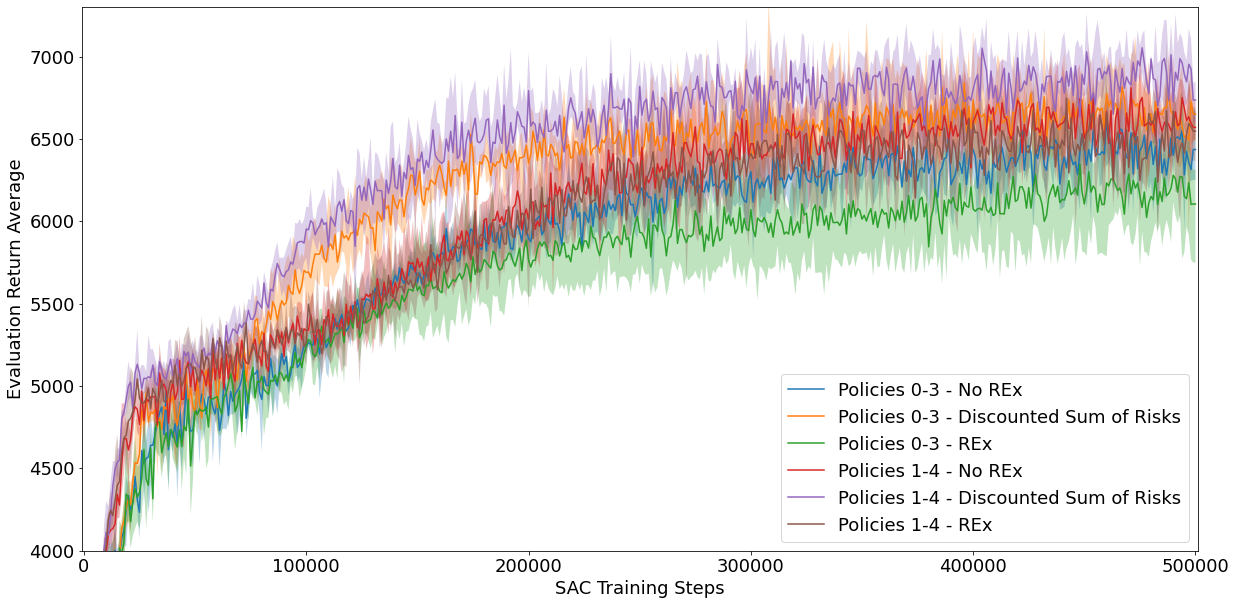

In [ ]:
feature = 'evaluation/return-average'
fig, ax = plt.subplots(1, 1, figsize=(20,10))
plt.rc('font', size=18)

d3rlpy_mp1_p0_3_no_rex        = np.vstack((MP112.sac.result[feature], MP116.sac.result[feature], MP120.sac.result[feature]))
d3rlpy_mp1_p1_4_no_rex        = np.vstack((MP114.sac.result[feature], MP118.sac.result[feature], MP122.sac.result[feature]))
d3rlpy_mp1_p0_3_no_rex_decay = np.vstack((MP140.sac.result[feature], MP141.sac.result[feature], MP142.sac.result[feature]))
d3rlpy_mp1_p1_4_no_rex_decay = np.vstack((MP143.sac.result[feature], MP144.sac.result[feature], MP145.sac.result[feature]))
d3rlpy_mp1_p0_3_rex           = np.vstack((MP113.sac.result[feature], MP117.sac.result[feature], MP121.sac.result[feature]))
d3rlpy_mp1_p1_4_rex           = np.vstack((MP115.sac.result[feature], MP119.sac.result[feature], MP123.sac.result[feature]))

ax.plot(np.arange(0, 500001, 1000), d3rlpy_mp1_p0_3_no_rex.mean(axis=0), label='Policies 0-3 - No REx')
ax.fill_between(np.arange(0, 500001, 1000), d3rlpy_mp1_p0_3_no_rex.min(axis=0), d3rlpy_mp1_p0_3_no_rex.max(axis=0), alpha=0.3)

ax.plot(np.arange(0, 500001, 1000), d3rlpy_mp1_p0_3_no_rex_decay.mean(axis=0), label='Policies 0-3 - Discounted Sum of Risks')
ax.fill_between(np.arange(0, 500001, 1000), d3rlpy_mp1_p0_3_no_rex_decay.min(axis=0), d3rlpy_mp1_p0_3_no_rex_decay.max(axis=0), alpha=0.3)

ax.plot(np.arange(0, 500001, 1000), d3rlpy_mp1_p0_3_rex.mean(axis=0), label='Policies 0-3 - REx')
ax.fill_between(np.arange(0, 500001, 1000), d3rlpy_mp1_p0_3_rex.min(axis=0), d3rlpy_mp1_p0_3_rex.max(axis=0), alpha=0.3)

ax.plot(np.arange(0, 500001, 1000), d3rlpy_mp1_p1_4_no_rex.mean(axis=0), label='Policies 1-4 - No REx')
ax.fill_between(np.arange(0, 500001, 1000), d3rlpy_mp1_p1_4_no_rex.min(axis=0), d3rlpy_mp1_p1_4_no_rex.max(axis=0), alpha=0.3)

ax.plot(np.arange(0, 500001, 1000), d3rlpy_mp1_p1_4_no_rex_decay.mean(axis=0), label='Policies 1-4 - Discounted Sum of Risks')
ax.fill_between(np.arange(0, 500001, 1000), d3rlpy_mp1_p1_4_no_rex_decay.min(axis=0), d3rlpy_mp1_p1_4_no_rex_decay.max(axis=0), alpha=0.3)

ax.plot(np.arange(0, 500001, 1000), d3rlpy_mp1_p1_4_rex.mean(axis=0), label='Policies 1-4 - REx')
ax.fill_between(np.arange(0, 500001, 1000), d3rlpy_mp1_p1_4_rex.min(axis=0), d3rlpy_mp1_p1_4_rex.max(axis=0), alpha=0.3)

ax.set_xlabel('SAC Training Steps')
ax.set_ylabel('Evaluation Return Average')
# ax.set_ylabel(feature)
ax.set_xlim(-1000, 501000)
ax.set_ylim(4000, 7300)
ax.legend()
# fig.savefig(os.path.join('dogo_plots', f'average_returns_MP1.png'), pad_inches=0.2, bbox_inches='tight')
pass